In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
data=pd.read_csv('data/housing.csv')

In [95]:
data.head()

,TRACT,LON,LAT,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,MEDV
0,2011,-70.955,42.2550,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,24.0
1,2021,-70.950,42.2875,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,21.6
2,2022,-70.936,42.2830,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,34.7
3,2031,-70.928,42.2930,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,33.4
4,2032,-70.922,42.2980,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,36.2


In [96]:
x=data.drop(['MEDV'],axis=1)
y=data['MEDV']

In [97]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=21,test_size=.25)

In [98]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_trains=std.fit_transform(x_train)
x_tests=std.fit_transform(x_test)

In [113]:
# Example of adding polynomial features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
x_trainp = poly.fit_transform(x_train)
x_testp = poly.transform(x_test)


In [128]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=.01)

In [129]:
from sklearn.model_selection import GridSearchCV

In [130]:
params={
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'max_iter': [5000,10000,20000]
}

In [131]:
grid=GridSearchCV(lasso,params,cv=5,scoring='neg_mean_squared_error', n_jobs=-1)

In [132]:
grid.fit(x_trainp,y_train)

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.753e+03, tolerance: 3.186e+00
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=Lasso(alpha=0.01), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [5000, 10000, 20000]},
             scoring='neg_mean_squared_error')

In [133]:
grid.best_params_

{'alpha': 1, 'max_iter': 5000}

In [126]:
model=grid.best_estimator_

In [127]:
y_pred=model.predict(x_testp)

In [83]:
from sklearn.metrics import mean_squared_error

In [84]:
mean_squared_error(y_test, y_pred)

22.663442950642196

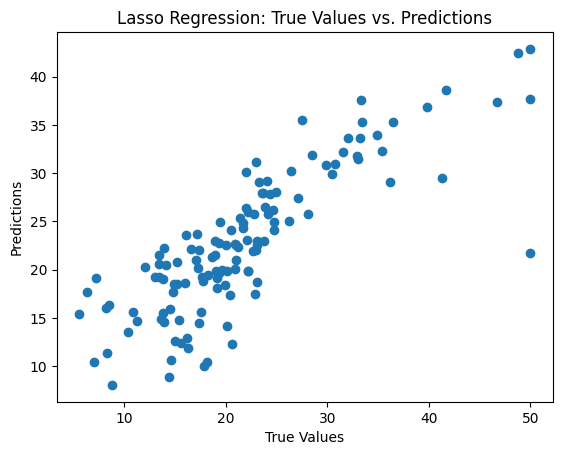

In [37]:
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Lasso Regression: True Values vs. Predictions")
plt.show()